<a href="https://colab.research.google.com/github/sahanant/reddit/blob/master/Mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
#image library
import PIL

In [0]:
#train_set = torchvision.datasets.FashionMNIST(root = '.data/FashionMNIST',train = True, download = True, transform= transforms.Compose([transforms.ToTensor]))
#train_loader = torch.utils.data.DataLoader(

#   train_set, batch_size = 10)


train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=64, shuffle=True)#here the only change is that we make use of the ToTensor() function to convert it from an object variable to a tensor

In [0]:
import numpy  as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth = 128)

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [0]:
class Network(nn.Module):
    
    def __init__(self):
        
        super(Network,self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels = 1,out_channels = 6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels = 6,out_channels = 12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features = 12*4*4 ,out_features = 120)
        self.fc2 = nn.Linear(in_features = 120 ,out_features = 60)
        self.out = nn.Linear(in_features = 60 ,out_features = 10)
        
    def forward(self, t):
        
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)
        
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)
        
        t = t.reshape(-1,12*4*4)
        t = self.fc1(t)
        t = F.relu(t)
        
        t = self.fc2(t)
        t = F.relu(t)
        
        t = self.out(t)
        t = F.softmax(t, dim = 1)
        
        return t
    

In [38]:
network = Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [39]:
#sample = next(iter(train_set))
#(iter(train_loader))[0]
examples = enumerate(train_loader)#we enumerate the dataset with indices as it would help us to keep a track of the data
batch_idx, (example_data, example_targets) = next(examples)# separation them into indx data and its value
example_data[0]

tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.42

In [0]:
#example_data[0].shape
a=np.array(example_data[0])
a=np.squeeze(a)# initial tensor of size 1,28,28 now we reduce it to a 2d image.To see the shape of the intial tensor remove the comment above and below 
#a.shape

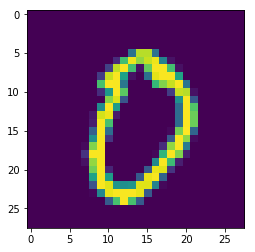

In [41]:

plt.imshow(a)#plotting the image from a matrix
plt.show()


In [43]:
print(example_targets[0])#printing from the value of the above tensor

tensor(0)
